In [1]:
import sys, os, json
sys.path.append(os.path.abspath("./../../feedback-grape"))
sys.path.append(os.path.abspath("./../../"))
sys.path.append(os.path.abspath("./../"))

from matplotlib import pyplot as plt
import numpy as np

from plot_helpers import * # to apply consistent plotting style

In [35]:
max_timesteps = 11

dir_ = "./eval/"

lut_dd001 = json.load(open(dir_ + "lut_t=3_l=2_w=001_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=discrete_rhoe=discrete_s=0.json"))["fidelity_each_timestep"][:max_timesteps]
lut_dd011 = json.load(open(dir_ + "lut_t=3_l=2_w=011_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=discrete_rhoe=discrete_s=0.json"))["fidelity_each_timestep"][:max_timesteps]
lut_dd111 = json.load(open(dir_ + "lut_t=3_l=2_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=discrete_rhoe=discrete_s=0.json"))["fidelity_each_timestep"][:max_timesteps]

lut_db111 = json.load(open(dir_ + "lut_t=3_l=2_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=discrete_rhoe=bloch_s=0.json"))["fidelity_each_timestep"][:max_timesteps]
lut_bb111 = json.load(open(dir_ + "lut_t=3_l=2_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=bloch_rhoe=bloch_s=0.json"))["fidelity_each_timestep"][:max_timesteps]

rnn_bb001 = json.load(open(dir_ + "rnn_t=3_w=001_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=bloch_rhoe=bloch_s=0.json"))["fidelity_each_timestep"][:max_timesteps]
rnn_bb011 = json.load(open(dir_ + "rnn_t=3_w=011_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=bloch_rhoe=bloch_s=0.json"))["fidelity_each_timestep"][:max_timesteps]
rnn_bb111 = json.load(open(dir_ + "rnn_t=3_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=bloch_rhoe=bloch_s=0.json"))["fidelity_each_timestep"][:max_timesteps]

rnn_dd001 = json.load(open(dir_ + "rnn_t=3_w=001_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=discrete_rhoe=discrete_s=0.json"))["fidelity_each_timestep"][:max_timesteps]
rnn_dd011 = json.load(open(dir_ + "rnn_t=3_w=011_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=discrete_rhoe=discrete_s=0.json"))["fidelity_each_timestep"][:max_timesteps]
rnn_dd111 = json.load(open(dir_ + "rnn_t=3_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=discrete_rhoe=discrete_s=0.json"))["fidelity_each_timestep"][:max_timesteps]
rnn_ee = json.load(open(dir_ + "rnn_t=3_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=excited_rhoe=excited_s=0.json"))["fidelity_each_timestep"][:max_timesteps]
lut_l6 = json.load(open(dir_ + "lut_t=3_l=6_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=discrete_rhoe=discrete_s=0.json"))["fidelity_each_timestep"][:max_timesteps]

baseline_b = np.load("./baseline/lut_t=3_l=6_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=bloch_rhoe=bloch.npz")["fidelities"][:max_timesteps]
baseline_d = np.load("./baseline/lut_t=3_l=6_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=discrete_rhoe=discrete_s=0..npz")["fidelities"][:max_timesteps]

Final fidelities: [53.71009961 56.06617173 93.64107766 47.15885432 98.34075983 60.21412846
 27.0475125  61.22168879]
3rd timestep: [97.37099947 90.68375781 96.54881513 86.55828315 98.00561415 82.57879826
 97.73021708 81.48515706]
Final fidelities: [75.08273031 84.83496516 58.39050877 56.06597077]
3rd timestep: [73.64731831 92.15830572 81.21808369 79.81790857]


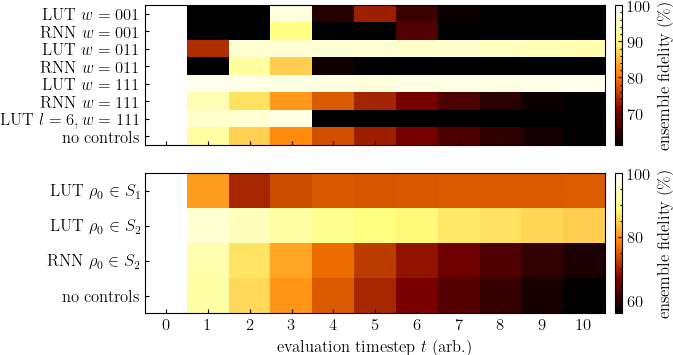

In [46]:
from sklearn import base


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6.1811,4), sharex=True)
mat1 = np.array([lut_dd001, rnn_dd001, lut_dd011, rnn_dd011, lut_dd111, rnn_dd111, lut_l6, baseline_d])*100
print("Final fidelities:", mat1[:,-1])
print("3rd timestep:", mat1[:,3])
im = ax1.imshow(
    mat1,
    aspect='auto',
    extent=[-0.5, max_timesteps-0.5, 0, 8],
    origin='upper',
    cmap='afmhot',
    vmin=baseline_d[-1]*100,
    vmax=100
)
cbar = fig.colorbar(im, ax=ax1, orientation='vertical', fraction=0.02, pad=0.02, label='$\\textrm{ensemble fidelity }(\\%)$')

ax1.set_yticks(
    [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5][::-1],
    [
        "$\\textrm{LUT }w=001$",
        "$\\textrm{RNN }w=001$",
        "$\\textrm{LUT }w=011$",
        "$\\textrm{RNN }w=011$",
        "$\\textrm{LUT }w=111$",
        "$\\textrm{RNN }w=111$",
        "$\\textrm{LUT }l=6,w=111$",
        "$\\textrm{no controls}$",
    ]
)
ax2.xaxis.minorticks_off()
ax1.yaxis.minorticks_off()
ax1.set_xticks(np.arange(0, max_timesteps, 1))

mat2 = np.array([lut_db111, lut_bb111, rnn_bb111, baseline_b])*100
print("Final fidelities:", mat2[:,-1])
print("3rd timestep:", mat2[:,3])
im = ax2.imshow(
    mat2,
    aspect='auto',
    extent=[-0.5, max_timesteps-0.5, 0, 4],
    origin='upper',
    cmap='afmhot',
    vmin=baseline_b[-1]*100,
    vmax=100
)
cbar = fig.colorbar(im, ax=ax2, orientation='vertical', fraction=0.02, pad=0.02, label='$\\textrm{ensemble fidelity }(\\%)$')
ax2.set_yticks(
    [0.5, 1.5, 2.5, 3.5][::-1],
    [
        "$\\textrm{LUT }\\rho_0 \\in S_1$",
        "$\\textrm{LUT }\\rho_0 \\in S_2$",
        "$\\textrm{RNN }\\rho_0 \\in S_2$",
        "$\\textrm{no controls}$",
    ]
)
ax2.xaxis.minorticks_off()
ax2.yaxis.minorticks_off()
ax2.set_xticks(np.arange(0, max_timesteps, 1))

ax2.set_xlabel("$\\textrm{evaluation timestep }t\\textrm{ (arb.)}$")

fig.savefig("./comparison_training_parameters.svg", bbox_inches='tight')